## 7.6 backtrader를 활용한 back test
퀀트 투자 quantitative investment에서 핵심요소이다.
**특정 투자 전략을 실제로 시장에 적용하기 전, 과거 데이터 historical data를 사용해 해당 전략이 얼마나 효과적인지를 검증하는 데 사용**

통계적지표\
CAGR compound annual growth rates, 연평균성장률\
MDD maximum drawdown, 최대손실 낙폭\
coefficient of correlation, 상관계수\
sharpe ratio, 샤프지수

back test - zipline, pyalgotrade, trading with python, by back test, **back trader**

In [2]:
def getCAGR(first, last, years):
    return (last/first)**(1/years)-1

cagr = getCAGR(65300,2669000,20)
print("SEC CAGR : {:.2%}".format(cagr))

SEC CAGR : 20.38%


### 7.6.1 backtrader install
RSI\
$$RS = \frac{N일간의\ 상승폭\ 평균}{N일간의\ 하락폭\ 평균} $$
$$RSI = 100-\frac{100}{1+RS} $$
N: 일봉 차트(14거래일), 주봉 차트(14주), 분봉 차트(14개 봉 bar)\
rsi_period의 숫자를 변경하는 것은 RSI 민감도를 조절하는 것과 같다.

| 기간설정 | 민감도 | 특징 | 용도 |
|:---:|:---:|---|---|
|6 or 7|높음|잦은 매매 신호<br> 노이즈가 많아져 거짓 신호의 위험|단기 매매, Scalping, 빠른 시장 진입, 청산|
|21 or 25|낮음|가격변화 둔감<br> 신호 발생이 드물지만 신뢰도가 높다.|정기 추세 분석, 스윙 트레이딩|
|표준 14|적절함|시장 노이즈를 어느 정도 걸러내면서도 추세변화에 반응|대부분 trader가 사용하는 표준분석|

In [4]:
import yfinance as yf

# 데이터를 다운로드하여 'stock_data.csv' 파일로 저장
ticker = '036570.KS'
start_date = '2024-01-01'
end_date = '2025-11-30'

df = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
print(df)
print(df.columns)
print(df.index.names)
print(df.tail())
#df.to_csv('stock_data.csv')
#print("데이터 다운로드 및 CSV 저장 완료.")

[*********************100%***********************]  1 of 1 completed

Price               Close           High            Low           Open  \
Ticker          036570.KS      036570.KS      036570.KS      036570.KS   
Date                                                                     
2024-01-02  237846.343750  238837.370182  232891.211589  234873.264453   
2024-01-03  227936.078125  238837.368818  227440.564912  234873.263111   
2024-01-04  227440.562500  228431.588916  223476.456836  225954.022876   
2024-01-05  222485.421875  228927.093332  221989.908686  226449.527387   
2024-01-08  216539.265625  223476.450336  216539.265625  219512.344787   
...                   ...            ...            ...            ...   
2025-11-24  202500.000000  212500.000000  197900.000000  198000.000000   
2025-11-25  208000.000000  211000.000000  199400.000000  205500.000000   
2025-11-26  213500.000000  227500.000000  209500.000000  211500.000000   
2025-11-27  213500.000000  218000.000000  210000.000000  216000.000000   
2025-11-28  210000.000000  216500.0000

In [14]:
import backtrader as bt
import yfinance as yf
from datetime import datetime

# 1) Download data with yfinance
df = yf.download("036570.KS", start="2024-01-01", end="2025-11-28", auto_adjust=True)

# 2) Remove MultiIndex
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]
#df.columns = df.columns.droplevel(1) # multi index로 인해 ticker를 제거하는 구문
#print(df.head())

# 3) Make a Backtrader data feed
data = bt.feeds.PandasData(dataname=df)

# 4) Use in Cerebro
cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)
cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.addsizer(bt.sizers.SizerFix, stake=30)

print("Initial Portfolio Value:", cerebro.broker.getvalue())
cerebro.run()
print("Final Portfolio Value:", cerebro.broker.getvalue())
cerebro.plot()


[*********************100%***********************]  1 of 1 completed

Initial Portfolio Value: 10000000
Final Portfolio Value: 12586928.569458239


[*********************100%***********************]  1 of 1 completed


Initial Portfolio Value : 10,000,000 KRW
Final Portfolio Value   : 11,775,465 KRW


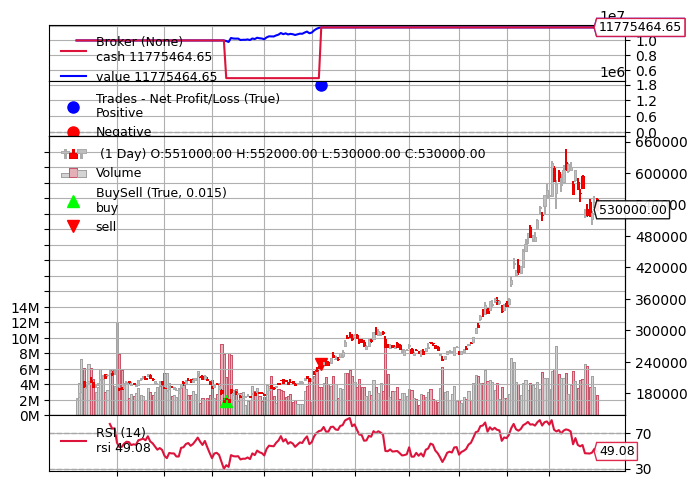

[[<Figure size 640x480 with 5 Axes>]]

In [50]:
from datetime import datetime
import backtrader as bt
import yfinance as yf
%matplotlib inline

ticker = '000660.KS'
start_date = '2025-01-01'

'''
tickers = [
    {'code': '005930.KS', 'label': '삼성전자', 'style': 'b-'},
    {'code': '000660.KS', 'label': 'SK하이닉스', 'style': 'g-'},
    {'code': '373220.KS', 'label': 'LG에너지솔루션', 'style': 'c-'},
    #{'code': '207940.KS', 'label': '삼성바이오로직', 'style': 'm-'},
    #{'code': '005380.KS', 'label': '현대차', 'style': 'r-'},
    #{'code': '034020.KS', 'label': '두산에너빌리티', 'style': 'y-'},
    #{'code': '329180.KS', 'label': 'HD현대중공업', 'style': 'k-'},    
    #{'code': '105560.KS', 'label': 'KB금융', 'style': 'b--'},    
    #{'code': '000270.KS', 'label': '기아', 'style': 'g--'},        
    #{'code': '012450.KS', 'label': '한화에어로스페이스', 'style': 'c--'},        
    #{'code': '068270.KS', 'label': '셀트리온', 'style': 'm--'},        
    #{'code': '402340.KS', 'label': 'SK스퀘어', 'style': 'r--'},        
    #{'code': '035420.KS', 'label': 'NAVER', 'style': 'y--'},        
    {'code': 'MSFT', 'label': 'Microsoft', 'style': 'b:'},
    {'code': 'AAPL', 'label': 'Apple', 'style': 'g:'},
    {'code': 'NVDA', 'label': 'Nvidia', 'style': 'c:'},
]
'''

# 1) Strategy
class MyStrategy(bt.Strategy):
    params = (('rsi_period', 14), ('oversold', 30), ('overbought', 70),)

    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data0.close, period=self.p.rsi_period)

    def next(self):
        # 매개변수 사용
        if not self.position:
            if self.rsi < self.p.oversold:
                self.buy()
        else:
            if self.rsi > self.p.overbought:
                self.sell()

# 2) Download data using yfinance
df = yf.download(ticker, start = start_date,  auto_adjust=True)
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

# 3) Set up Backtrader
data = bt.feeds.PandasData(dataname=df)

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)

cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.addsizer(bt.sizers.SizerFix, stake=30)

# 4) Run backtest
print(f"Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW")
cerebro.run()
print(f"Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW")

# 5) Plot (avoid Javascript error)
cerebro.plot(iplot=False, style='candlestick', figsize=(20, 15)) 
#Backtrader’s plotting uses matplotlib + some JavaScript that Jupyter does not load correctly
#IDLE 실행하거나, %matplotlib inline 추가

### 7.6.4 RSI_SMA를 이용한 백테스트
RSI\
$$RS = \frac{N일간의\ 상승폭\ 평균}{N일간의\ 하락폭\ 평균} $$
$$RSI = 100-\frac{100}{1+RS} $$
N: 일봉 차트(14거래일), 주봉 차트(14주), 분봉 차트(14개 봉 bar)\
rsi_period의 숫자를 변경하는 것은 RSI 민감도를 조절하는 것과 같다.

| 기간설정 | 민감도 | 특징 | 용도 |
|:---:|:---:|---|---|
|6 or 7|높음|잦은 매매 신호<br> 노이즈가 많아져 거짓 신호의 위험|단기 매매, Scalping, 빠른 시장 진입, 청산|
|21 or 25|낮음|가격변화 둔감<br> 신호 발생이 드물지만 신뢰도가 높다.|정기 추세 분석, 스윙 트레이딩|
|표준 14|적절함|시장 노이즈를 어느 정도 걸러내면서도 추세변화에 반응|대부분 trader가 사용하는 표준분석|

self.rsi = bt.indicators.RSI(self.data0.close, period=self.p.rsi_period)에서
만약 종목을 두개 넣으면\
cerebro.adddata(data1)  # 삼성전자\
cerebro.adddata(data2)  # SK하이닉스 가 된다.

[*********************100%***********************]  1 of 1 completed


Initial Portfolio Value : 10,000,000 KRW
Final Portfolio Value   : 10,000,000 KRW


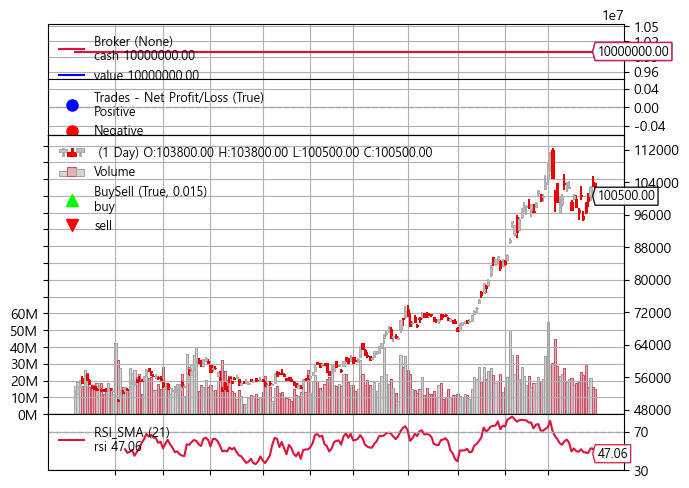

[[<Figure size 640x480 with 5 Axes>]]

In [17]:
# Yahoo finance
from datetime import datetime
import backtrader as bt
import yfinance as yf
%matplotlib inline

ticker = '005930.KS'
start_date = '2025-01-01'

'''
tickers = [
    {'code': '005930.KS', 'label': '삼성전자', 'style': 'b-'},
    {'code': '000660.KS', 'label': 'SK하이닉스', 'style': 'g-'},
    {'code': '373220.KS', 'label': 'LG에너지솔루션', 'style': 'c-'},
    #{'code': '207940.KS', 'label': '삼성바이오로직', 'style': 'm-'},
    #{'code': '005380.KS', 'label': '현대차', 'style': 'r-'},
    #{'code': '034020.KS', 'label': '두산에너빌리티', 'style': 'y-'},
    #{'code': '329180.KS', 'label': 'HD현대중공업', 'style': 'k-'},    
    #{'code': '105560.KS', 'label': 'KB금융', 'style': 'b--'},    
    #{'code': '000270.KS', 'label': '기아', 'style': 'g--'},        
    #{'code': '012450.KS', 'label': '한화에어로스페이스', 'style': 'c--'},        
    #{'code': '068270.KS', 'label': '셀트리온', 'style': 'm--'},        
    #{'code': '402340.KS', 'label': 'SK스퀘어', 'style': 'r--'},        
    #{'code': '035420.KS', 'label': 'NAVER', 'style': 'y--'},
    #{'code': '036570.KS', 'label': '엔씨소프트', 'style': 'y--'},
    {'code': 'MSFT', 'label': 'Microsoft', 'style': 'b:'},
    {'code': 'AAPL', 'label': 'Apple', 'style': 'g:'},
    {'code': 'NVDA', 'label': 'Nvidia', 'style': 'c:'},
]
'''

# 1) Strategy
class MyStrategy(bt.Strategy):
    params = (('rsi_period', 21), ('oversold', 30), ('overbought', 70),)

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=self.p.rsi_period)

    def notify_order(self, order):  # ①
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:  # ② 
            if order.isbuy():
                self.log(f'BUY  : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log(f'SELL : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELD')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None
   
    def next(self):
        if not self.position:
            if self.rsi < self.p.oversold:
                self.order = self.buy()
        else:
            if self.rsi > self.p.overbought:
                self.order = self.sell()
                
    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

# 2) Download data using yfinance
df = yf.download(ticker, start = start_date,  auto_adjust=True)
df.columns = [col[0] if isinstance(col, tuple) else col for col in df.columns]

# 3) Set up Backtrader
data = bt.feeds.PandasData(dataname=df)

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)

cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission=0.0014)
cerebro.addsizer(bt.sizers.PercentSizer, percents=90)

# 4) Run backtest
print(f"Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW")
cerebro.run()
print(f"Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW")

# 5) Plot (avoid Javascript error)
cerebro.plot(iplot=False, style='candlestick', figsize=(20, 15)) 
#Backtrader’s plotting uses matplotlib + some JavaScript that Jupyter does not load correctly
#IDLE 실행하거나, %matplotlib inline 추가

Naver finance, MariaDB\
bt.indicators package: Accdecoscillator, ATR, Bollinger, CCI, Crossover, Deviation, DirectionalMove, DMA, EMA, Ichimoku, MACD, Momentum, SMA, Stochastic, Williams, WMA 등 대부분 지표를 이미 모듈로 제공하고 있다.
**nofify_order**
주문 상태에 변화가 있을 때마다 자동으로 실행된다. 주문를 객체로 넘겨 받는다. 주문상태는 완료(Complete), 취소(Canceled), 마진, 거절등으로 나뉜다.\
수수료(Commission)은 매수나 매도가 발생할 때마다 차감된다. 주식매도 0.25% 증권거래세로 내야하고, 증권회사별로 다르지만 주식을 매수하거나 매도할 때 일반적으로  0.015% 증권거래수수료를 내야한다. 주식을 한번 거래(매수/매도)할 때 댜략 0.28% 비용이 소요된다. 백트레이더에서는 매수 마도 시점마다 수수료가 동일 비율로 두번 차감되므로, 0.28%를 2로 나누어 수수료를 0.14%로 설정함.

end_date is initialized to '2025-11-30'
Initial Portfolio Value : 10,000,000 KRW
[2024-09-05] BUY  : 주가 70,100, 수량 129, 수수료 12,618, 자산 9,845,953
[2025-02-20] SELL : 주가 59,100, 수량 -129, 수수료 10,638, 자산 8,562,458
[2025-03-12] BUY  : 주가 53,800, 수량 144, 수수료 10,829, 자산 8,709,779
[2025-03-24] SELL : 주가 61,200, 수량 -144, 수수료 12,318, 자산 9,603,228
[2025-04-10] BUY  : 주가 56,600, 수량 163, 수수료 12,922, 자산 9,557,692
[2025-06-19] SELL : 주가 60,500, 수량 -163, 수수료 13,812, 자산 10,212,481
Final Portfolio Value   : 10,212,481 KRW


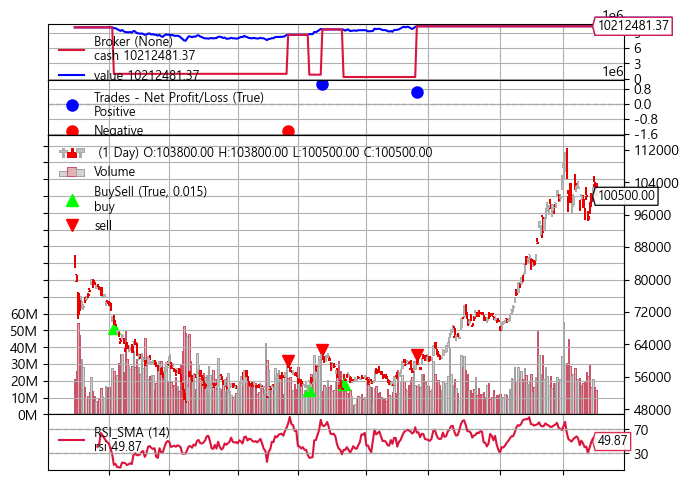

[[<Figure size 640x480 with 5 Axes>]]

In [19]:
# Naver finance_MariaDB_Simple moving average
from datetime import datetime
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

investar_parent_path = 'C:\\myPackage'
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
from Investar.Analyzer import MarketDB
mk = MarketDB()

company = '005930'
start_date = "2024-08-01"

# 1) Strategy
class MyStrategy(bt.Strategy):
    params = (('rsi_period', 14), ('oversold', 30), ('overbought', 70),) #period: Normal 14, long 21, short 6

    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=self.p.rsi_period) #Simple Moving Average
        #self.rsi = bt.indicators.RSI_EMA(self.data.close, period=self.p.rsi_period) #Exponential Moving Average
        #self.rsi = bt.indicators.RSI(self.data0.close, period=self.p.rsi_period) #Moving Average

    def notify_order(self, order):  # ①
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:  # ② 
            if order.isbuy():
                self.log(f'BUY  : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log(f'SELL : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELD')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None
   
    def next(self):
        if not self.position:
            if self.rsi < self.p.oversold:
                self.order = self.buy()
        else:
            if self.rsi > self.p.overbought:
                self.order = self.sell()
                
    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

# 2) Download data using MariaDB
df = mk.get_daily_price(company, start_date)
# 컬럼 Rename (반드시 필요!)
df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})
# date 컬럼이 있을 경우 인덱스로 지정
if 'date' in df.columns:
    df.index = pd.to_datetime(df['date'])
#print(df)

# 3) Set up Backtrader
data = bt.feeds.PandasData(dataname=df)

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)

cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission=0.0014)
cerebro.addsizer(bt.sizers.PercentSizer, percents=90)

# 4) Run backtest
print(f"Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW")
cerebro.run()
print(f"Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW")

# 5) Plot (avoid Javascript error)
cerebro.plot(iplot=False, style='candlestick', figsize=(20, 15)) 
#Backtrader’s plotting uses matplotlib + some JavaScript that Jupyter does not load correctly
#IDLE 실행하거나, %matplotlib inline 추가

end_date is initialized to '2025-11-30'
Initial Portfolio Value : 10,000,000 KRW
[2025-08-29] BUY  : 주가 70,100, 수량 129, 수수료 12,691, 자산 9,935,585
[2025-09-10] SELL : 주가 71,800, 수량 -129, 수수료 12,998, 자산 10,194,139
[2025-11-10] BUY  : 주가 98,600, 수량 94, 수수료 12,936, 자산 10,368,633
Final Portfolio Value   : 10,359,261 KRW


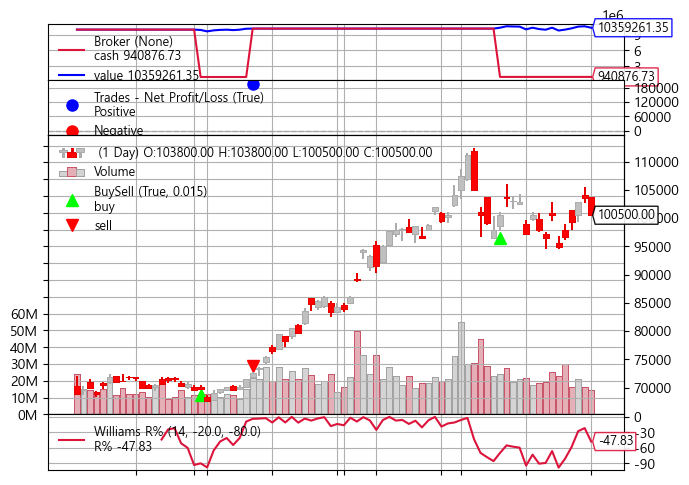

[[<Figure size 640x480 with 5 Axes>]]

In [14]:
# Naver finance_MariaDB_Williams %R
from datetime import datetime
import backtrader as bt
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

%matplotlib inline
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False

investar_parent_path = 'C:\\myPackage'
if investar_parent_path not in sys.path:
    sys.path.append(investar_parent_path)
from Investar.Analyzer import MarketDB
mk = MarketDB()

company = '005930'
start_date = "2025-08-01"
'''
tickers = [
    {'code': '005930.KS', 'label': '삼성전자', 'style': 'b-'},
    {'code': '000660.KS', 'label': 'SK하이닉스', 'style': 'g-'},
    {'code': '373220.KS', 'label': 'LG에너지솔루션', 'style': 'c-'},
    #{'code': '207940.KS', 'label': '삼성바이오로직', 'style': 'm-'},
    #{'code': '005380.KS', 'label': '현대차', 'style': 'r-'},
    #{'code': '034020.KS', 'label': '두산에너빌리티', 'style': 'y-'},
    #{'code': '329180.KS', 'label': 'HD현대중공업', 'style': 'k-'},    
    #{'code': '105560.KS', 'label': 'KB금융', 'style': 'b--'},    
    #{'code': '000270.KS', 'label': '기아', 'style': 'g--'},        
    #{'code': '012450.KS', 'label': '한화에어로스페이스', 'style': 'c--'},        
    #{'code': '068270.KS', 'label': '셀트리온', 'style': 'm--'},        
    #{'code': '402340.KS', 'label': 'SK스퀘어', 'style': 'r--'},        
    #{'code': '035420.KS', 'label': 'NAVER', 'style': 'y--'},
    #{'code': '036570.KS', 'label': '엔씨소프트', 'style': 'y--'},
    {'code': 'MSFT', 'label': 'Microsoft', 'style': 'b:'},
    {'code': 'AAPL', 'label': 'Apple', 'style': 'g:'},
    {'code': 'NVDA', 'label': 'Nvidia', 'style': 'c:'},
]
'''
# 1) Strategy
class MyStrategy(bt.Strategy):
    #params = (('rsi_period', 14), ('oversold', 30), ('overbought', 70),) #period: Normal 14, long 21, short 6
    # Williams %R 지표의 매개변수를 설정합니다.
    # period: 일반적으로 14를 사용
    # upper_threshold: -20 (과매수 기준, 매도 신호)
    # lower_threshold: -80 (과매도 기준, 매수 신호)
    params = (('wr_period', 14), ('oversold', -80), ('overbought', -20),)
    
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        #self.rsi = bt.indicators.RSI_SMA(self.data.close, period=self.p.rsi_period) #Simple Moving Average
        #self.rsi = bt.indicators.RSI_EMA(self.data.close, period=self.p.rsi_period) #Exponential Moving Average
        #self.rsi = bt.indicators.RSI(self.data0.close, period=self.p.rsi_period) #Moving Average
        self.williams_r = bt.indicators.WilliamsR(self.data0, period=self.p.wr_period)

    def notify_order(self, order):  # ①
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:  # ② 
            if order.isbuy():
                self.log(f'BUY  : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log(f'SELL : 주가 {order.executed.price:,.0f}, '
                    f'수량 {order.executed.size:,.0f}, '
                    f'수수료 {order.executed.comm:,.0f}, '
                    f'자산 {cerebro.broker.getvalue():,.0f}') 
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELD')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None

    def next(self):
        # 포지션이 없으면 매수 신호를 찾습니다 (과매도, 즉 -80 미만일 때)
        if not self.position:
            # Williams %R 값이 설정된 과매도 기준보다 낮을 때 매수 (예: -85 < -80)
            if self.williams_r < self.p.oversold:
                self.order = self.buy()
        # 포지션이 있으면 매도 신호를 찾습니다 (과매수, 즉 -20 초과일 때)
        else:
            # Williams %R 값이 설정된 과매수 기준보다 높을 때 매도 (예: -15 > -20)
            if self.williams_r > self.p.overbought:
                self.order = self.sell()
 
    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

# 2) Download data using MariaDB
df = mk.get_daily_price(company, start_date)
# 컬럼 Rename (반드시 필요!)
df = df.rename(columns={'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})
# date 컬럼이 있을 경우 인덱스로 지정
if 'date' in df.columns:
    df.index = pd.to_datetime(df['date'])
#print(df)

# 3) Set up Backtrader
data = bt.feeds.PandasData(dataname=df)

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)

cerebro.adddata(data)
cerebro.broker.setcash(10000000)
cerebro.broker.setcommission(commission=0.0014)
cerebro.addsizer(bt.sizers.PercentSizer, percents=90)

# 4) Run backtest
print(f"Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} KRW")
cerebro.run()
print(f"Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} KRW")

# 5) Plot (avoid Javascript error)
cerebro.plot(iplot=False, style='candlestick', figsize=(20, 15)) 
#Backtrader’s plotting uses matplotlib + some JavaScript that Jupyter does not load correctly
#IDLE 실행하거나, %matplotlib inline 추가